## Data preprocessing

#### The need for data preprocessing

1. Data contains null text values which need to be removed.
2. Data contains html text which needs to be removed.
3. Data contains punctuations, contractions which need to be aptly dealt with to make data ready for featurization

#### The need for feature engineering and featurization

1. Data is in text format which cannot be fed to machine learning models as the system cannot understand textual data. Therefore, data needs to be converted to numeric form i.e. vectors to be able to be used for training machine learning model. Featurization therefore is required to convert the textual data into numeric features that can actually be fed to machine learning model to work on.

In [27]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = None
%matplotlib inline

In [2]:
# Importing the training data
df = pd.read_csv('train.csv').set_index('id')
df.head()

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [3]:
# As there are only three null values, we can safely remove those null values form the dataset
df.dropna(inplace=True)
df.shape

(404287, 5)

In [4]:
# The columns qid1 and qid2 are nothing but identifiers for the questions and therefore can be dropped. 
df.drop(columns =['qid1','qid2'],inplace=True)

In [5]:
# check for random subset of data to identify different formatting issues present in the data
df.sample(10)

,question1,question2,is_duplicate
id,,,
60045,What do you think of Mr. Modi's decision to discontinue Rs 500 and 1000 currencies as of midnight November 8th?,What do you think about Modi's new policy on the ban of Rs 500 and Rs 1000 notes?,1
274764,How do I find a factorial of a number quickly?,How to find the factorial of a number quickly?,1
336130,How much will a trip to Goa cost?,How much does one week trip to goa cost?,1
381967,Where is the list of all the topics on Quora?,Where can I find a list of all Quora-related topics?,1
232329,How do I prepare for regional rural banks?,How are the jobs of Regional Rural banks under officer Cadre?,0
169594,"Does EVERYONE with OCD have that popular OCD symptom and obsession of symmetry, order, organization and exactness?","Does EVERYONE with OCD have that popular OCD symptom and obsession of symmetry, order, organization and, exactness?",1
136175,What are the top PS Vita RPG games?,"In PS Vita's safe mode function, the rebuild database always removes the same game. Is the game a risk?",0
371437,What should I spend Platinum on in Warframe?,How do I play Warframe co-op with Steam or another platform?,0
275742,Is there anyone familiar with Vensim Modelling or modelling in general?,What are generalized additive models?,0


#### After carefully inspecting different samples of dataset we can observe that data has following issues that need to be dealt with : 
1. Contractios like "can't", "haven't", etc
2. Data contains mathematical equations.
3. Pronunciations for some words presented in parenthesis. 
4. Acronyms like 'BITS', 'IIT', , 'DJ'
5. Text descriptions and clarifications in parenthesis.
6. Punctuation symbols.

#### Here are the Preprocessing steps that will be used to address these issues : 
1. Convert all the text in lower case
2. Remove html tags using regex
3. Replace contractions with the corresponding exapanded form

In [6]:
# reference : https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
def cleanhtml(raw_html, CLEANR):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

# reference : https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontracted(phrase):
    
    # mathematical symbols 
    phrase = re.sub(r'000,000', 'm',phrase)
    phrase = re.sub(r'000','k',phrase)
    
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def preprocessText(text):
    # convert text to lower case
    text = text.lower()
    # remove html tags and unknown unicode characters like &nbsm etc
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text = cleanhtml(text, CLEANR)
    # remove contractions
    text = decontracted(text)
    return text

In [7]:
# Applying the preprocessing on the question 1 and question 2 columns
df['question1'] = df['question1'].apply(preprocessText)
df['question2'] = df['question2'].apply(preprocessText)
df.sample(5)

,question1,question2,is_duplicate
id,,,
12612,i am confused between vivo v5 and oneplus 2 which one is better?,"which phone should i buy, the oneplus 2 or meizu mx4? which one is better?",0
291788,where can i buy fresh vegetables and fruits in bangalore through online?,where can i buy vegetables and fruits in noida through online?,0
163884,"i do not find my husband as attractive, like before. how do i change this?",i do not think i have ever given my husband a gift he truly liked. this year i want that to change. what are some suggestions?,0
68663,how do i make a grilled cheese sandwich without soggy bread?,how much cheese can you put in a grilled cheese sandwich?,0
237879,is there a shortcut code on facebook for the tears of joy emoji?,should not there be an iphone emoji for tears of joy?,0


#### Why punctuations or parenthesis or acronyms ain't removed from text ? 

Punctuations have some significance associated with them. Older vectorization techniques were incapable of handling punctuations and therefore they were dropped from the text data. Now, however, with the advance in NLP technology, we have much powerful embeddings that can actually very well handle punctuation symbols. Same goes for acronyms and parenthesis. Modern embeddings are pretrained on large set of documents with corpus size ranging in millions and even billions. Therefore, embeddings are powerful enough to correctly represent the acronyms and parenthesis and the data inside the parenthesis. Therefore, we are not removing the punctuation symbols, parenthesis. 
Ideally, acronyms should actually be expanded into their complete form and then fed to model, however, it is not possible in this case to come up with a finite set of acronyms that would suffice the problem at hand. Therefore, we are leaving them as it for the embeddings to handle.

#### Why not do Stemming and Lemmatization ? 

Stemming and Lemmatization are the approaches used to reduce the total number of words in the vocabulary by replacing the different forms of the words by their root word or stem word. When this stem word is obtained by truncating the last few characters or the  first few characters without bothering about semantic meaning, it is referred to as stemming. When the same procedure is followed in accord with grammar of the language and linguistics in such a way that final stemmed word obtained still has some semantic meaning assoicated with it and is an actual word, it is referred to as Lemmatization. 

As pretrained embeddings are trained on vocabulary sizes of billions, they can easily handle different words and their different forms making stemming and lemmatization obsolete.

#### Spliting the data into train and test split

In [10]:
# Separating independent features from target feature
X,y = df[['question1', 'question2']], df['is_duplicate'].values

In [12]:
# Computing the percentage of data that will be used for testing
10000/df.shape[0]

0.02473490366991766

There are total of 404287 records in data. 10000 examples would suffice for the rest set which is equivalent to 2.5% of the total dataset size. 

In [39]:
# Splitting the data into train and test set using stratified sampling to preserve the ratio of different class labels in 
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.025, random_state=42, stratify )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((394179, 2), (10108, 2), (394179,), (10108,))

<BarContainer object of 2 artists>

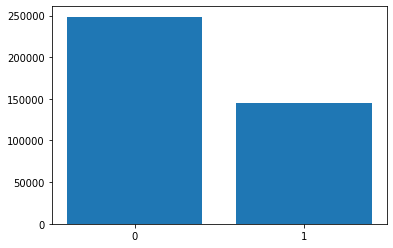

In [42]:
# Verifying the distribution of target class in train dataset
labels = ['0', '1']
count_train = [ y_train.shape[0]-sum(y_train), y_train.sum()]
plt.bar(labels, count)

<BarContainer object of 2 artists>

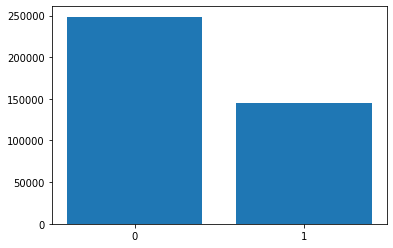

In [43]:
# Verifying the distribution of target class in test dataset
count_test = [ y_test.shape[0] - sum(y_test), y_test.sum() ]
plt.bar(labels, count)

In [44]:
# Saving the train and test data to files.
X_train.to_csv('X_train.tsv', index=None, sep='\t')
X_test.to_csv('X_test.tsv', index=None, sep='\t')
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)